### Data Description:


The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.


### Domain:


Object recognition


### Context:


The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.


### Attribute Information:

● All the features are geometric features extracted from the silhouette.

● All are numeric in nature.


### Objective:

Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

### Importing the relevant libraries

In [1]:
import numpy as np # for dataframe handling
import pandas as pd #array handling
import seaborn as sns # plotting
sns.set(color_codes=True)
import matplotlib.pyplot as plt # plotting
%matplotlib inline
# For preprocessing the data

from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn import metrics
# To model the SVM
from sklearn import svm
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
#KFold cross validation
from sklearn.model_selection import KFold
#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC


In [2]:
# Reading the data as dataframe and print the first five rows
data = pd.read_csv('vehicle-1.csv')
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [4]:
data.shape #no of rows and columns in the dataframe

(846, 19)

There are 846 rows and 19 Columns in the DataFrame

In [5]:
data.dtypes # to get the data type of each attributes 

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

All the input features are numerics of type integer or float. Only the "class" is of type object, as it is categorical in nature.

##### Checking the presence of missing values

In [6]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are missing Values in majority of the columns

#### Missing Values Treatment

In [7]:
# Split the dataset according to their class types
unique_vehicles = [data[data['class'] == veh] for veh in data['class'].unique()]

# Replaces the NULLs with the median of the respective feature
for unique_veh in unique_vehicles:
    for col in unique_veh.columns[:-1]:
        median = unique_veh[col].median()
        unique_veh[col] = unique_veh[col].fillna(median)

# Join the splitted datasets back together and sort the index
data = pd.concat(unique_vehicles).sort_index()

In [8]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Descriptive statistics of each & every column

In [9]:
data.describe().transpose() 

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.826241    6.134340   33.0   40.00   
distance_circularity         846.0   82.066194   15.754263   40.0   70.00   
radius_ratio                 846.0  168.916076   33.427561  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.680851    7.882557   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.920804   33.199802  112.0  147.00   
elongatedness                846.0   40.927896    7.813401   26.0   33.00   
pr.axis_rectangularity       846.0   20.579196    2.590879   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.643026   31.378020  130.0  167.00   
scaled_variance.1            846.0  439.665485  176.492876  184.0  318.25   
scaled_radius_of_gyration    846.0  174.712766   32.546284  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.470873   59.0   67.00   
skewness_about               846.0    6.356974    4.904073    0.0    2.00   
skewness_about.1             846.0   12.604019    8.930921    0.0    5.00   
skewness_about.2             846.0  188.919622    6.152167  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                                50%     75%     max  
compactness                   93.00  100.00   119.0  
circularity                   44.00   49.00    59.0  
distance_circularity          80.00   98.00   112.0  
radius_ratio                 167.25  195.00   333.0  
pr.axis_aspect_ratio          61.00   65.00   138.0  
max.length_aspect_ratio        8.00   10.00    55.0  
scatter_ratio                157.00  198.00   265.0  
elongatedness                 43.00   46.00    61.0  
pr.axis_rectangularity        20.00   23.00    29.0  
max.length_rectangularity    146.00  159.00   188.0  
scaled_variance              179.00  217.00   320.0  
scaled_variance.1            364.00  586.75  1018.0  
scaled_radius_of_gyration    174.00  198.00   268.0  
scaled_radius_of_gyration.1   71.00   75.00   135.0  
skewness_about                 6.00    9.00    22.0  
skewness_about.1              11.00   19.00    41.0  
skewness_about.2             188.00  193.00   206.0  
hollows_ratio                197.00  201.00   211.0

### Five Point Summary

In [10]:
summary=data.describe().T
summary[['min', '25%', '50%', '75%', 'max']]

min     25%     50%     75%     max
compactness                   73.0   87.00   93.00  100.00   119.0
circularity                   33.0   40.00   44.00   49.00    59.0
distance_circularity          40.0   70.00   80.00   98.00   112.0
radius_ratio                 104.0  141.00  167.25  195.00   333.0
pr.axis_aspect_ratio          47.0   57.00   61.00   65.00   138.0
max.length_aspect_ratio        2.0    7.00    8.00   10.00    55.0
scatter_ratio                112.0  147.00  157.00  198.00   265.0
elongatedness                 26.0   33.00   43.00   46.00    61.0
pr.axis_rectangularity        17.0   19.00   20.00   23.00    29.0
max.length_rectangularity    118.0  137.00  146.00  159.00   188.0
scaled_variance              130.0  167.00  179.00  217.00   320.0
scaled_variance.1            184.0  318.25  364.00  586.75  1018.0
scaled_radius_of_gyration    109.0  149.00  174.00  198.00   268.0
scaled_radius_of_gyration.1   59.0   67.00   71.00   75.00   135.0
skewness_about                 0.0    2.00    6.00    9.00    22.0
skewness_about.1               0.0    5.00   11.00   19.00    41.0
skewness_about.2             176.0  184.00  188.00  193.00   206.0
hollows_ratio                181.0  190.25  197.00  201.00   211.0

### Univariate and Bivariate Analysis

In [11]:
data.skew(numeric_only  = True)

compactness                    0.381271
circularity                    0.263772
distance_circularity           0.113963
radius_ratio                   0.392906
pr.axis_aspect_ratio           3.833530
max.length_aspect_ratio        6.778394
scatter_ratio                  0.605787
elongatedness                  0.049787
pr.axis_rectangularity         0.772492
max.length_rectangularity      0.256359
scaled_variance                0.650013
scaled_variance.1              0.839768
scaled_radius_of_gyration      0.279364
scaled_radius_of_gyration.1    2.088197
skewness_about                 0.783217
skewness_about.1               0.687841
skewness_about.2               0.249421
hollows_ratio                 -0.226341
dtype: float64

Skewness with positive values indicates data is skewed towards right. Skewness with negative values indicates data is skewed towards left

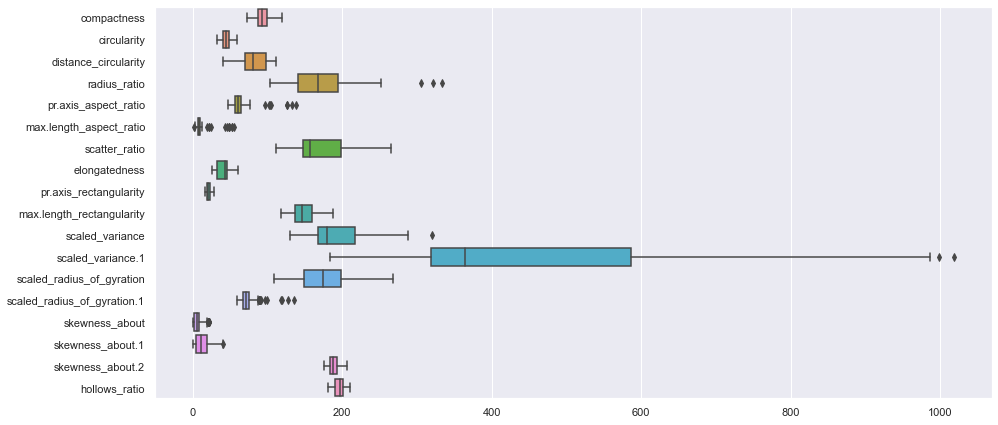

In [12]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data.iloc[:, 0:18], orient = 'h')

From above graph we found that many of the columns are having outliers 

### compactness 

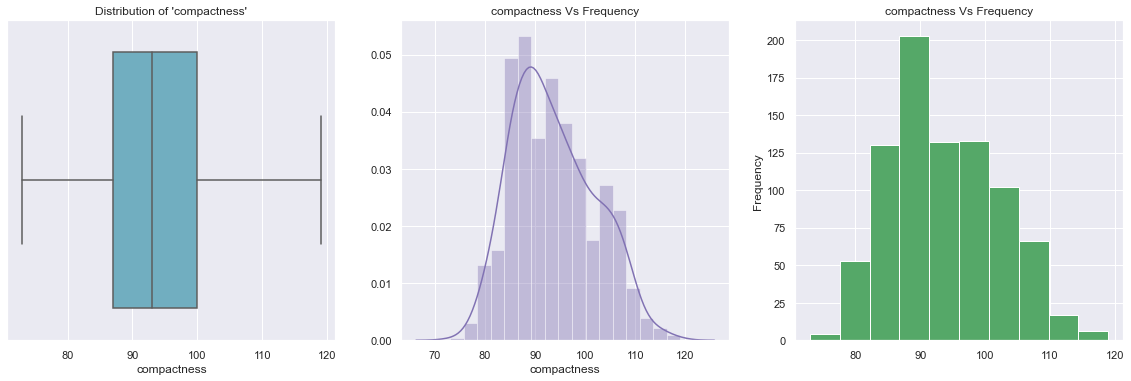

In [13]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['compactness'], showfliers=True,color='c').set_title("Distribution of 'compactness'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['compactness'],color='m').set_title("compactness Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['compactness'].plot.hist(color='g').set_title("compactness Vs Frequency");

#### Observation
- The column is almost Normally Distributed
- Mean and Median are almost the same
- Most of the values are between 87 to 100
- There are no outliers

### circularity

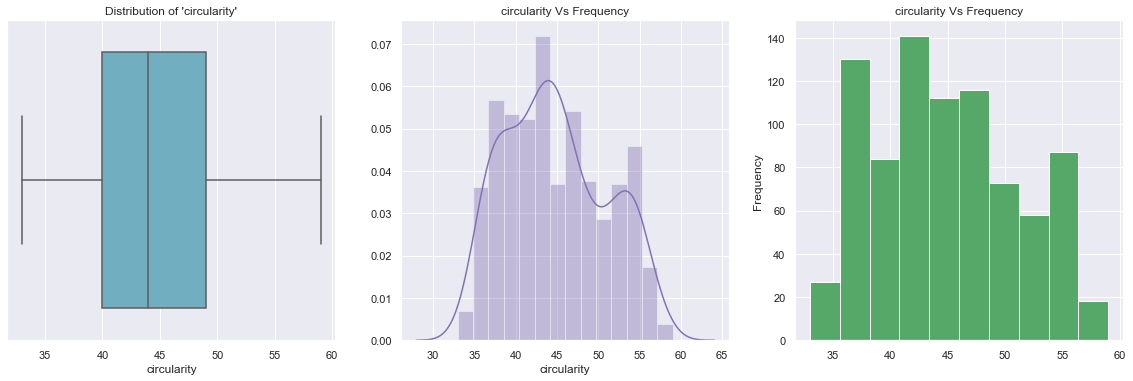

In [14]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['circularity'], showfliers=True,color='c').set_title("Distribution of 'circularity'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['circularity'],color='m').set_title("circularity Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['circularity'].plot.hist(color='g').set_title("circularity Vs Frequency");

#### Observation
- The column is almost Normally Distributed
- Mean and Median are almost the same
- Most of the values are between 40 to 49
- There are no outliers

### distance_circularity

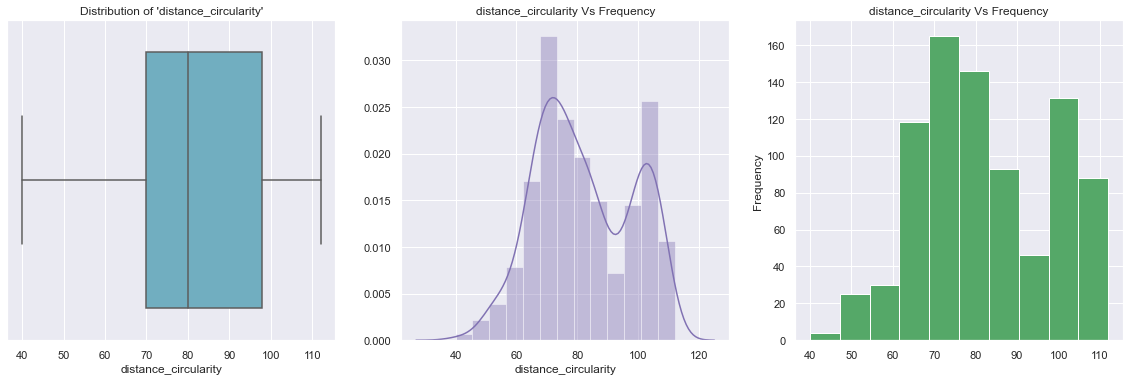

In [15]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['distance_circularity'], showfliers=True,color='c').set_title("Distribution of 'distance_circularity'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['distance_circularity'],color='m').set_title("distance_circularity Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['distance_circularity'].plot.hist(color='g').set_title("distance_circularity Vs Frequency");

#### Observation
- The column is  slightly skewed towards right.
- Mean is slightly greater than Median
- Most of the values are between 70 to 98
- There are no outliers

### radius_ratio

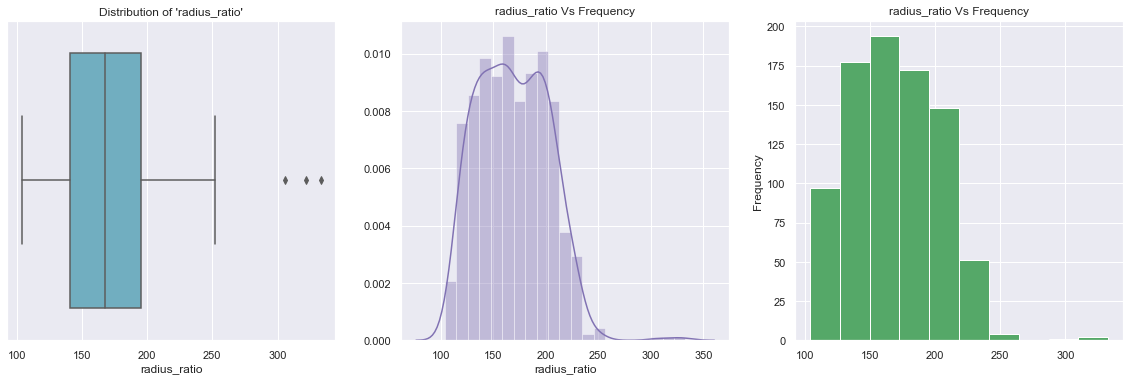

In [16]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['radius_ratio'], showfliers=True,color='c').set_title("Distribution of 'radius_ratio'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['radius_ratio'],color='m').set_title("radius_ratio Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['radius_ratio'].plot.hist(color='g').set_title("radius_ratio Vs Frequency");

#### Observation
- The column is  slightly skewed towards right.
- Mean is slightly greater than Median
- Most of the values are between 141 to 195
- There are outliers

### pr.axis_aspect_ratio

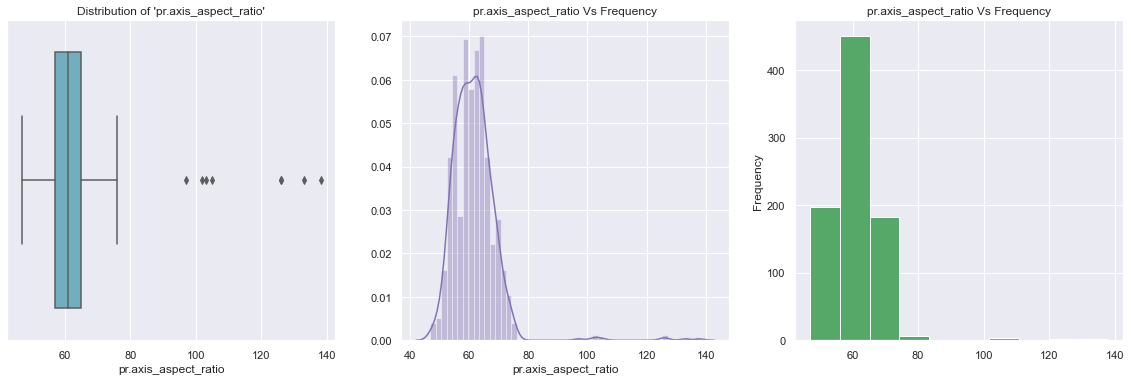

In [17]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['pr.axis_aspect_ratio'], showfliers=True,color='c').set_title("Distribution of 'pr.axis_aspect_ratio'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['pr.axis_aspect_ratio'],color='m').set_title("pr.axis_aspect_ratio Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['pr.axis_aspect_ratio'].plot.hist(color='g').set_title("pr.axis_aspect_ratio Vs Frequency");

#### Observation
- The column is  slightly skewed towards right.
- Mean is slightly greater than Median
- Most of the values are between 57 to 65
- There are outliers

### max.length_aspect_ratio

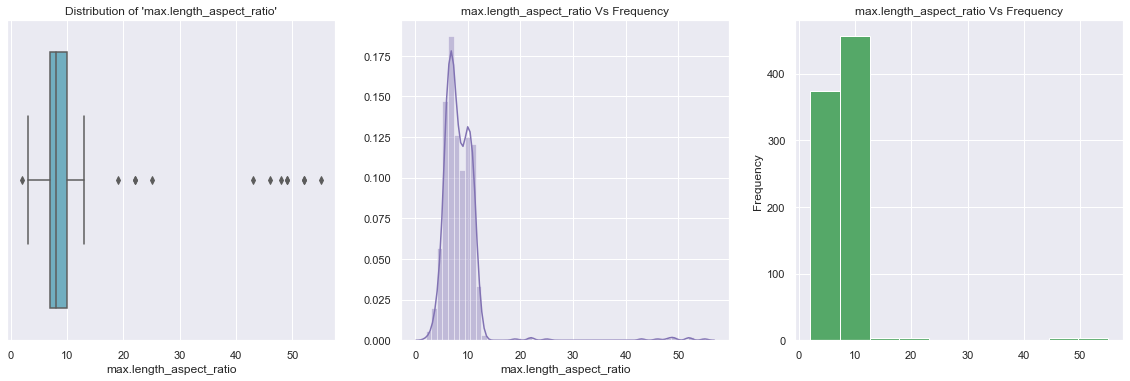

In [18]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['max.length_aspect_ratio'], showfliers=True,color='c').set_title("Distribution of 'max.length_aspect_ratio'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['max.length_aspect_ratio'],color='m').set_title("max.length_aspect_ratio Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['max.length_aspect_ratio'].plot.hist(color='g').set_title("max.length_aspect_ratio Vs Frequency");

#### Observation
- The column is  slightly skewed towards right.
- Mean is slightly greater than Median
- Most of the values are between 7 to 10
- There are outliers

### scatter_ratio

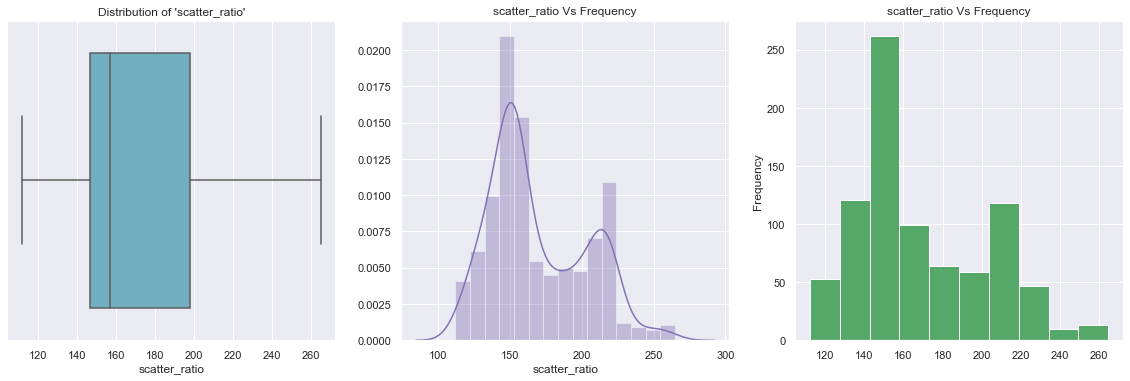

In [19]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['scatter_ratio'], showfliers=True,color='c').set_title("Distribution of 'scatter_ratio'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['scatter_ratio'],color='m').set_title("scatter_ratio Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['scatter_ratio'].plot.hist(color='g').set_title("scatter_ratio Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 147 to 198
- There are no outliers

### elongatedness

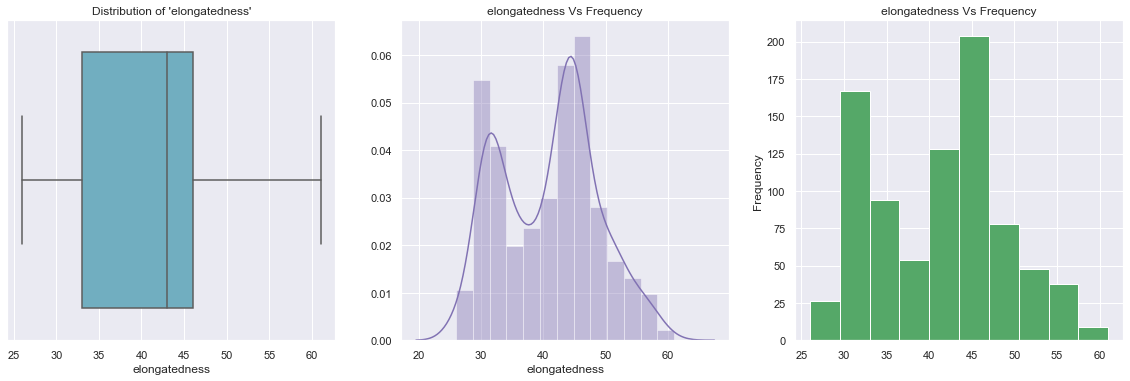

In [20]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['elongatedness'], showfliers=True,color='c').set_title("Distribution of 'elongatedness'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['elongatedness'],color='m').set_title("elongatedness Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['elongatedness'].plot.hist(color='g').set_title("elongatedness Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  Less than Median
- Most of the values are between 33 to 46
- There are no outliers

### pr.axis_rectangularity

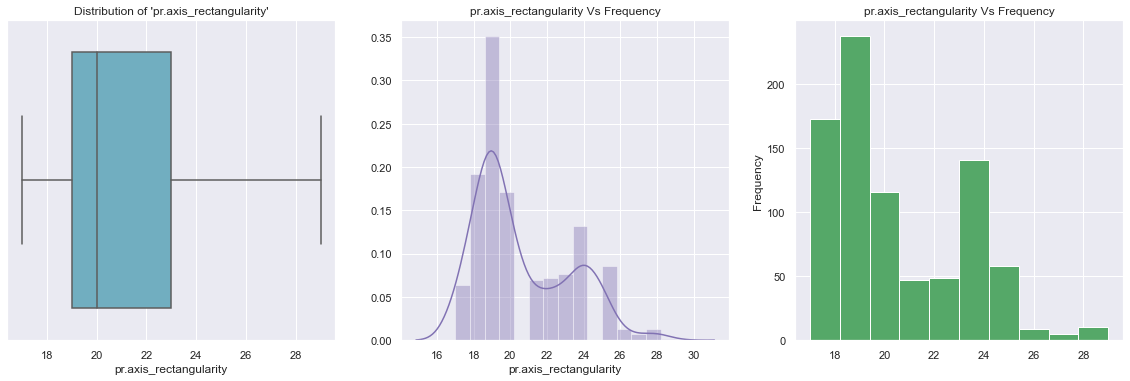

In [21]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['pr.axis_rectangularity'], showfliers=True,color='c').set_title("Distribution of 'pr.axis_rectangularity'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['pr.axis_rectangularity'],color='m').set_title("pr.axis_rectangularity Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['pr.axis_rectangularity'].plot.hist(color='g').set_title("pr.axis_rectangularity Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 19 to 23
- There are no outliers

### max.length_rectangularity

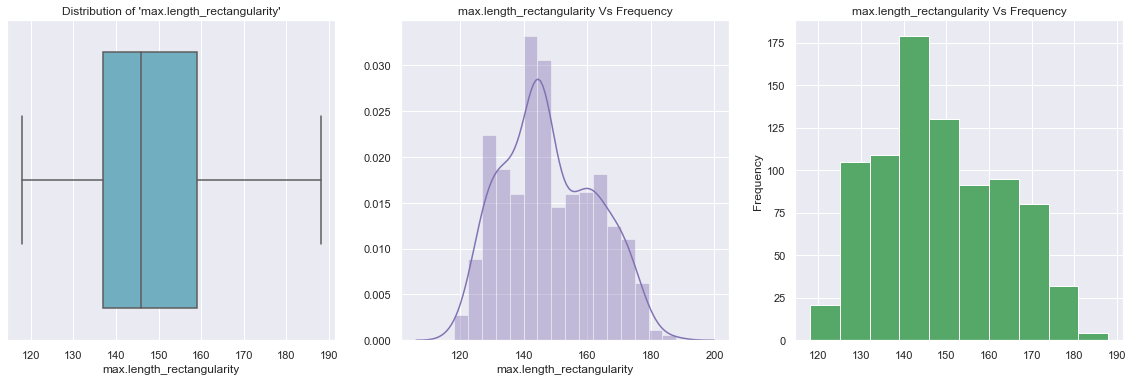

In [22]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['max.length_rectangularity'], showfliers=True,color='c').set_title("Distribution of 'max.length_rectangularity'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['max.length_rectangularity'],color='m').set_title("max.length_rectangularity Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['max.length_rectangularity'].plot.hist(color='g').set_title("max.length_rectangularity Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 137 to 159
- There are no outliers

### scaled_variance

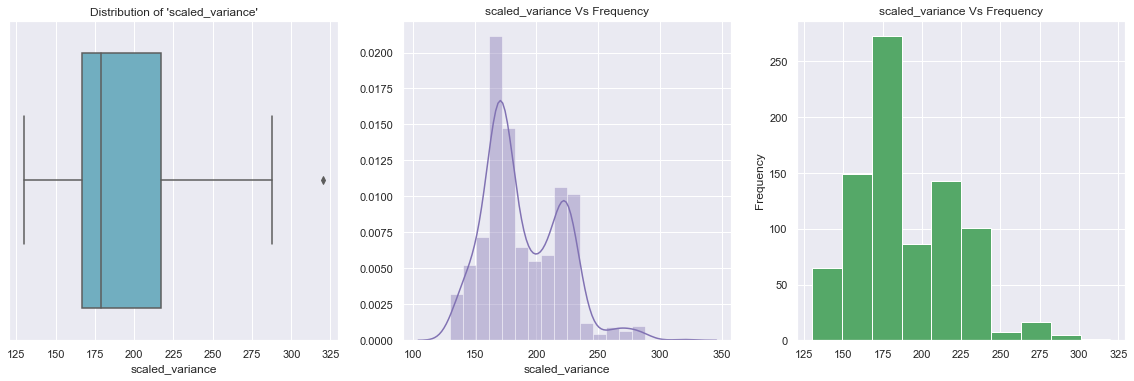

In [23]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['scaled_variance'], showfliers=True,color='c').set_title("Distribution of 'scaled_variance'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['scaled_variance'],color='m').set_title("scaled_variance Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['scaled_variance'].plot.hist(color='g').set_title("scaled_variance Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 167 to 217
- There are outliers

### scaled_variance.1


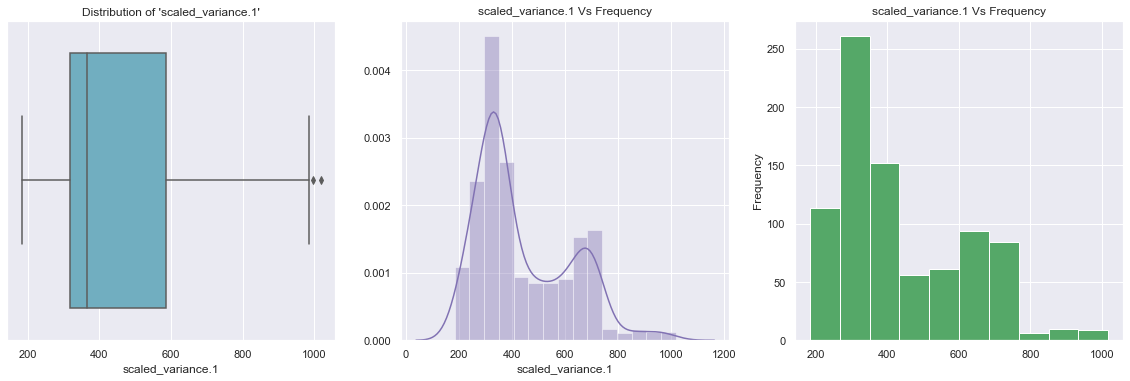

In [24]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['scaled_variance.1'], showfliers=True,color='c').set_title("Distribution of 'scaled_variance.1'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['scaled_variance.1'],color='m').set_title("scaled_variance.1 Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['scaled_variance.1'].plot.hist(color='g').set_title("scaled_variance.1 Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 318 to 587
- There are outliers

### scaled_radius_of_gyration


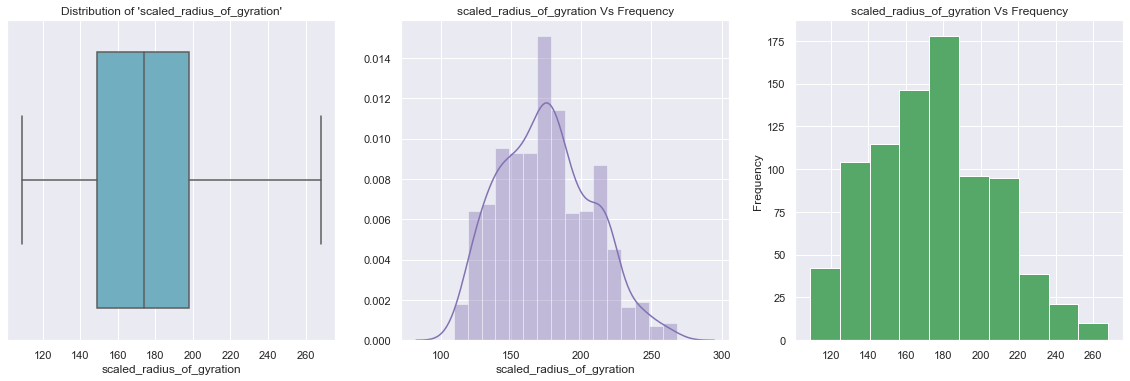

In [25]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['scaled_radius_of_gyration'], showfliers=True,color='c').set_title("Distribution of 'scaled_radius_of_gyration'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['scaled_radius_of_gyration'],color='m').set_title("scaled_radius_of_gyration Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['scaled_radius_of_gyration'].plot.hist(color='g').set_title("scaled_radius_of_gyration Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 149 to 198
- There are no outliers

### scaled_radius_of_gyration.1


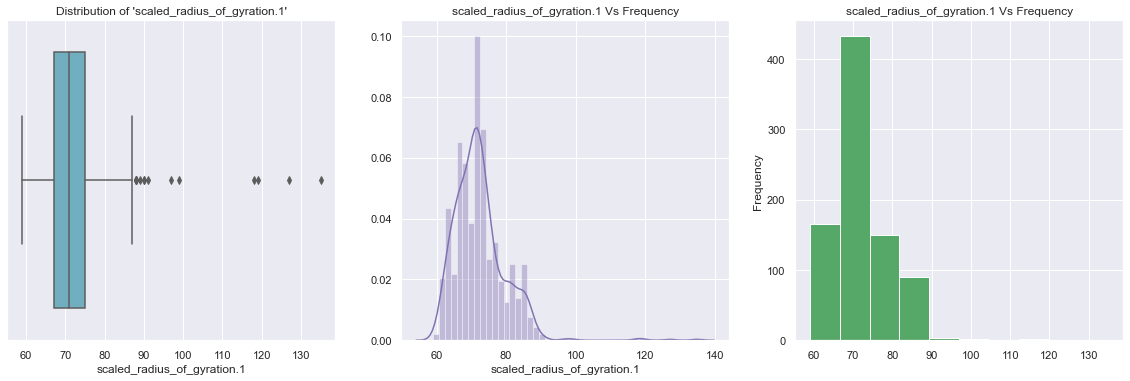

In [26]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['scaled_radius_of_gyration.1'], showfliers=True,color='c').set_title("Distribution of 'scaled_radius_of_gyration.1'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['scaled_radius_of_gyration.1'],color='m').set_title("scaled_radius_of_gyration.1 Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['scaled_radius_of_gyration.1'].plot.hist(color='g').set_title("scaled_radius_of_gyration.1 Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 67 to 75
- There are outliers

### skewness_about


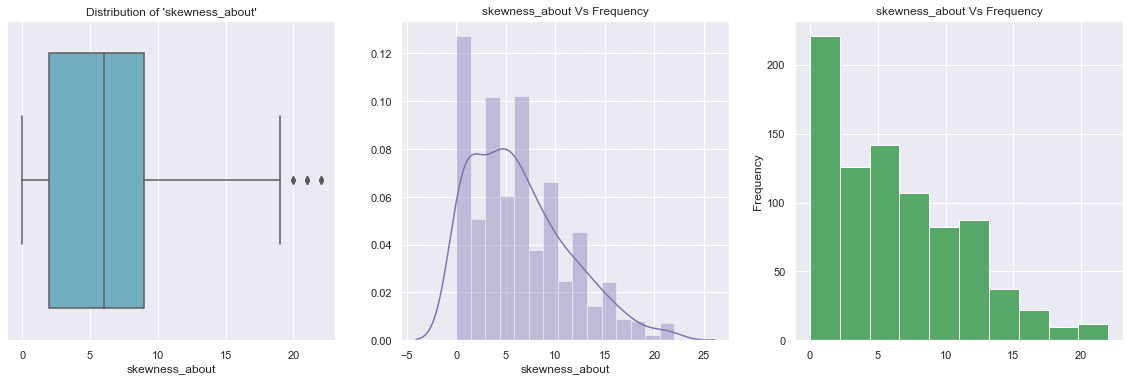

In [27]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['skewness_about'], showfliers=True,color='c').set_title("Distribution of 'skewness_about'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['skewness_about'],color='m').set_title("skewness_about Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['skewness_about'].plot.hist(color='g').set_title("skewness_about Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 2 to 6
- There are outliers

### skewness_about.1


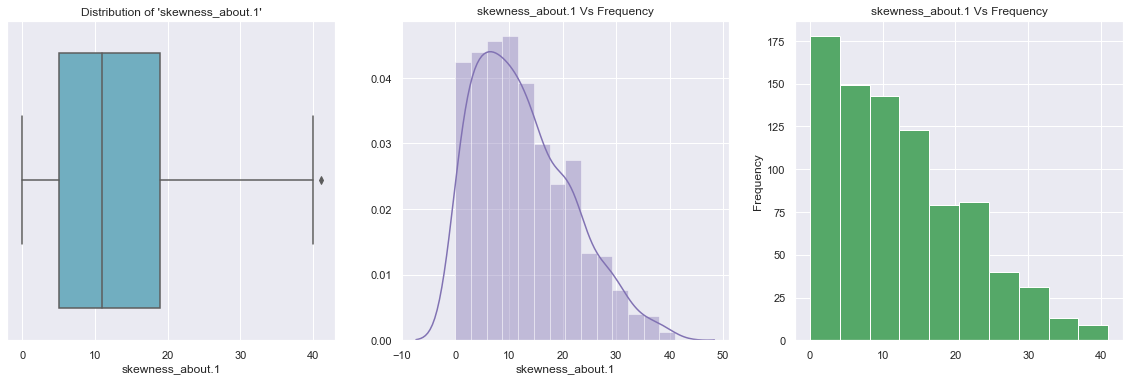

In [28]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['skewness_about.1'], showfliers=True,color='c').set_title("Distribution of 'skewness_about.1'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['skewness_about.1'],color='m').set_title("skewness_about.1 Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['skewness_about.1'].plot.hist(color='g').set_title("skewness_about.1 Vs Frequency");

#### Observation
- The column is  skewed towards right.
- Mean is  greater than Median
- Most of the values are between 5 to 19
- There are outliers

### skewness_about.2


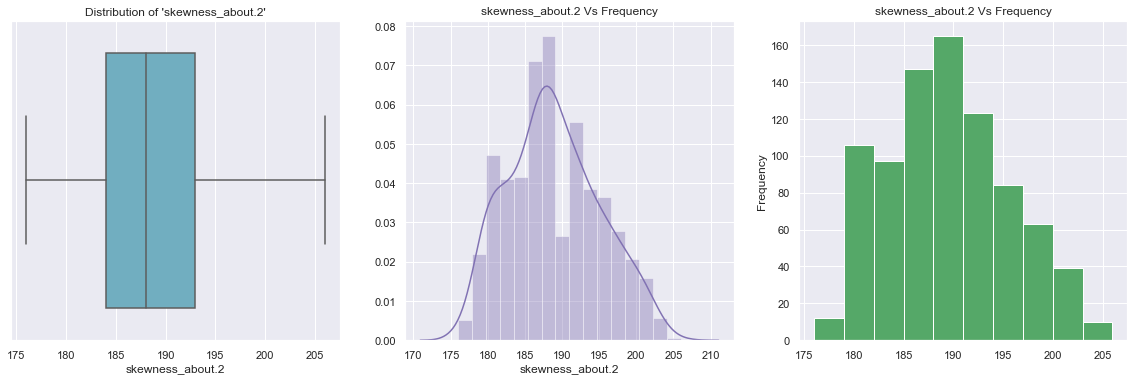

In [29]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['skewness_about.2'], showfliers=True,color='c').set_title("Distribution of 'skewness_about.2'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['skewness_about.2'],color='m').set_title("skewness_about.2 Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['skewness_about.2'].plot.hist(color='g').set_title("skewness_about.2 Vs Frequency");

#### Observation
- The column is  almost Normally Distributed
- Mean is  slightly greater than Median
- Most of the values are between 184 to 193
- There are no outliers

### hollows_ratio


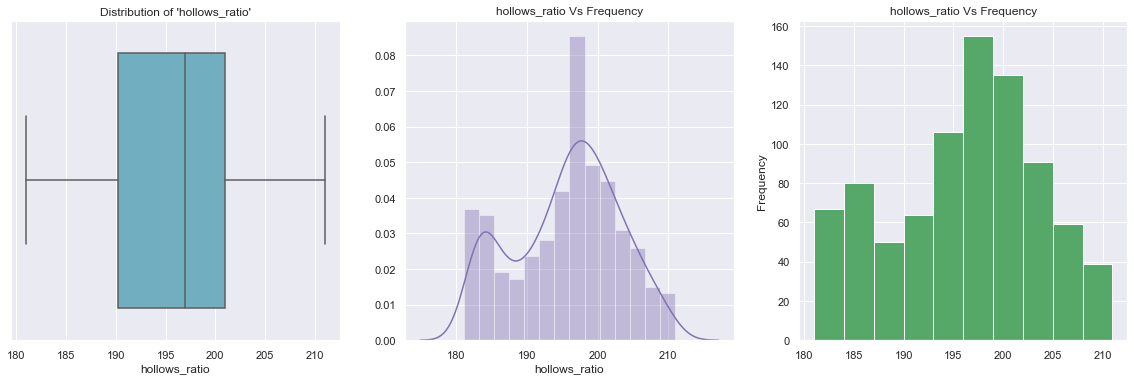

In [30]:
plt.figure(figsize= (20,20))
#boxplot
plt.subplot(3,3,1)
sns.boxplot(data['hollows_ratio'], showfliers=True,color='c').set_title("Distribution of 'hollows_ratio'")

#distplot
plt.subplot(3,3,2)
sns.distplot(data['hollows_ratio'],color='m').set_title("hollows_ratio Vs Frequency")

#histogram plot
plt.subplot(3,3,3)
data['hollows_ratio'].plot.hist(color='g').set_title("hollows_ratio Vs Frequency");

#### Observation
- The column is skewed towrds left
- Mean is  less than Median
- Most of the values are between 197 to 211
- There are no outliers

### Outlier Treatement


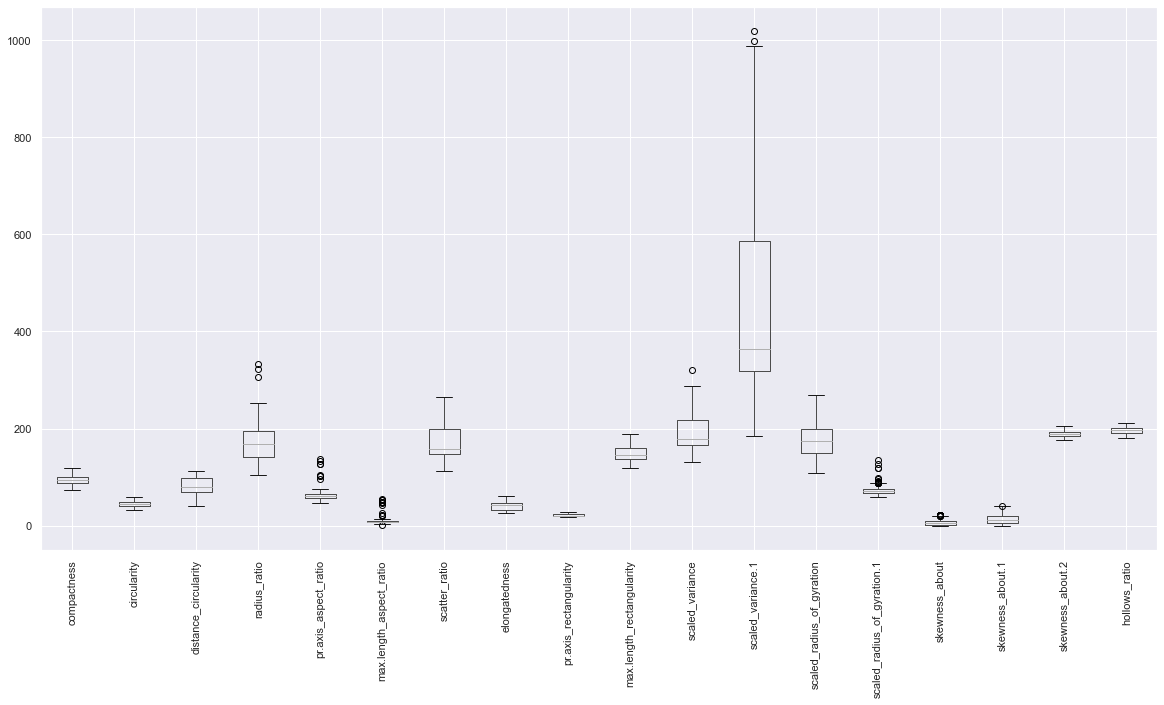

In [31]:
# Plot the central tendency of the dataset
_, bp = data.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [32]:
# Count the number of outlier data points present in each feature
for idx, col in enumerate(data.columns[:-1]):
    print(col, '--', len(fliers[idx]))

compactness -- 0
circularity -- 0
distance_circularity -- 0
radius_ratio -- 3
pr.axis_aspect_ratio -- 8
max.length_aspect_ratio -- 13
scatter_ratio -- 0
elongatedness -- 0
pr.axis_rectangularity -- 0
max.length_rectangularity -- 0
scaled_variance -- 1
scaled_variance.1 -- 2
scaled_radius_of_gyration -- 0
scaled_radius_of_gyration.1 -- 15
skewness_about -- 12
skewness_about.1 -- 1
skewness_about.2 -- 0
hollows_ratio -- 0


There are 8 Columns in the dataset which contains outliers 

In [33]:
# Treat the outlier data points
for idx, col in enumerate(data.columns[:-1]):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    data.loc[(data[col] < low), col] = caps[idx * 2][0]
    data.loc[(data[col] > high), col] = caps[idx * 2 + 1][0]

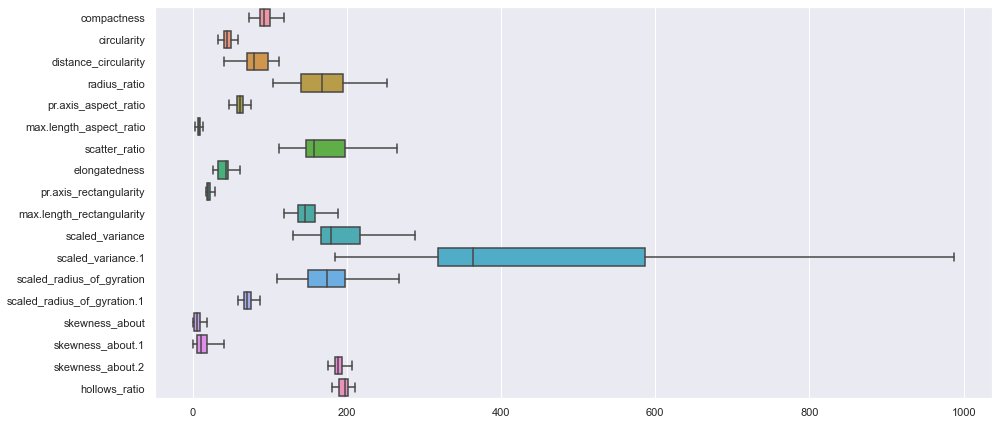

In [34]:
# Check the dataset after Outlier treatment
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data.iloc[:, 0:18], orient = 'h')

### Target Column (Status) Distribution

In [35]:
class_counts = pd.DataFrame(data["class"].value_counts()).reset_index()
class_counts.columns =["Labels","class"]
class_counts

Labels  class
0    car    429
1    bus    218
2    van    199

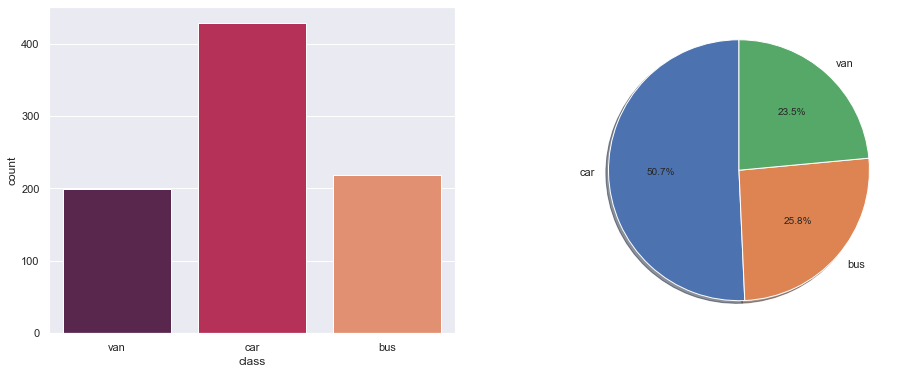

In [36]:
# Check the frequency distribution of each target class
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(data["class"], ax=axes[0], palette='rocket')
_ = axes[1].pie(data["class"].value_counts(), autopct='%1.1f%%', shadow=True, startangle=90, labels=data["class"].value_counts().index)


#### Observation 
- From the above graph we understand that almost half of the data is car and percentage  of van and bus is  23.5 and 25.8% respectively
so it is in the ratio 2:1:1 and we also know there are two types of  car , ie Saab 9000 and an Opel Manta 400.So the data is almost balanced

In [37]:
# Compare class wise mean
pd.pivot_table(data, index='class', aggfunc=['mean']).T

class                                    bus         car         van
mean circularity                   44.963303   46.034965   42.070352
     compactness                   91.591743   96.184149   90.562814
     distance_circularity          76.701835   88.878788   73.256281
     elongatedness                 40.114679   38.088578   47.939698
     hollows_ratio                191.325688  197.582751  196.145729
     max.length_aspect_ratio        6.545872    8.825175    8.592965
     max.length_rectangularity    146.701835  149.967366  145.175879
     pr.axis_aspect_ratio          63.064220   60.993007   60.030151
     pr.axis_rectangularity        20.573394   21.512821   18.572864
     radius_ratio                 165.724771  180.629371  146.130653
     scaled_radius_of_gyration    180.986239  179.613054  157.276382
     scaled_radius_of_gyration.1   76.743119   69.925408   72.206030
     scaled_variance              192.889908  197.932401  163.804020
     scaled_variance.1            448.701835  500.596737  298.201005
     scatter_ratio                170.022936  181.062937  141.537688
     skewness_about                 4.798165    7.062937    6.417085
     skewness_about.1              10.211009   15.165501    9.698492
     skewness_about.2             187.811927  189.473193  188.939698


#### Observations:
- There is not much of variation of any features in all the three vehicle types.

### Influence of Different attributes on Class

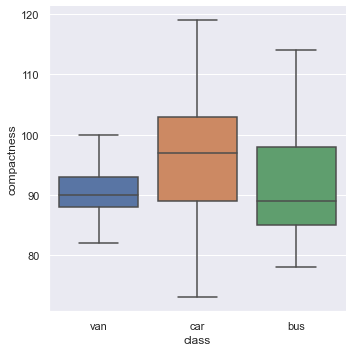

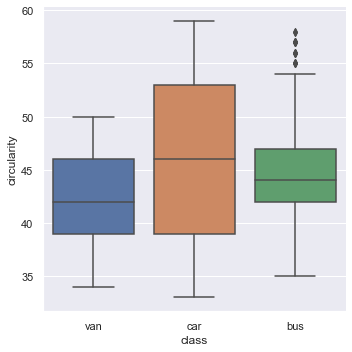

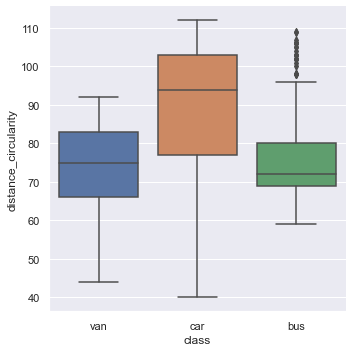

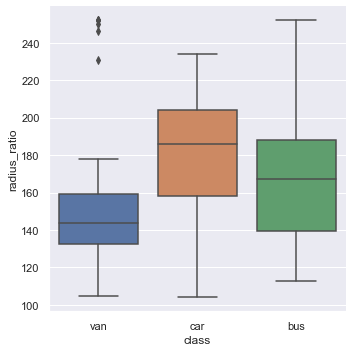

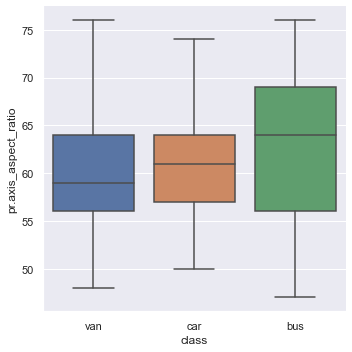

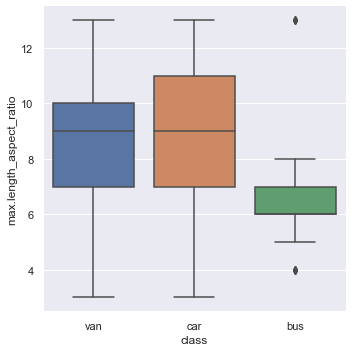

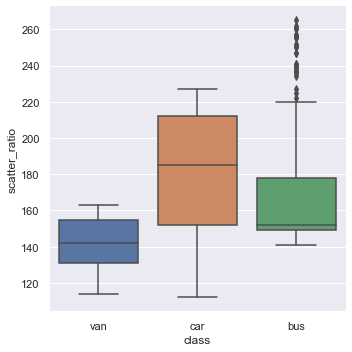

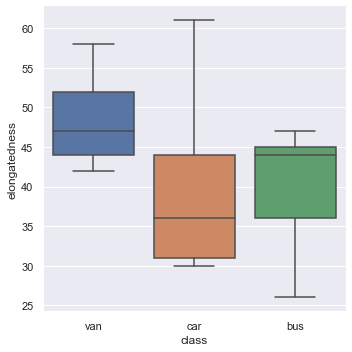

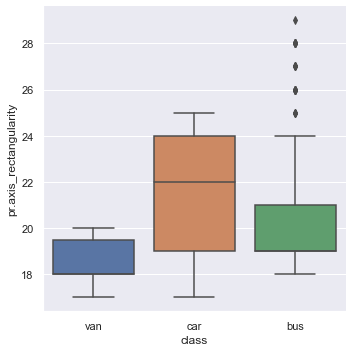

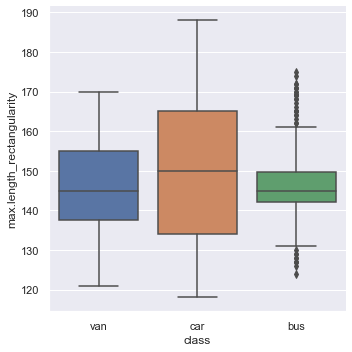

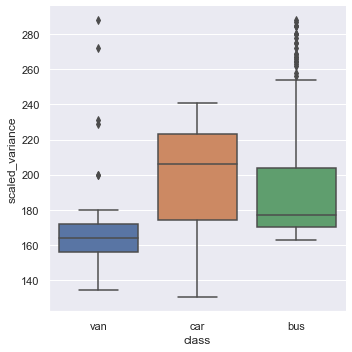

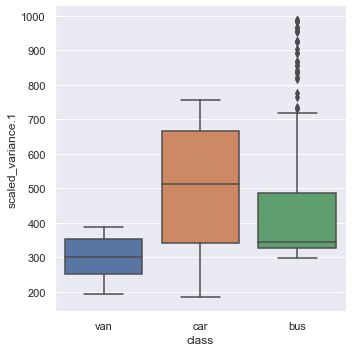

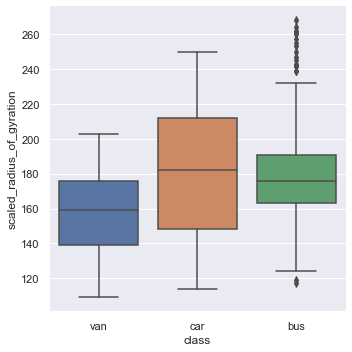

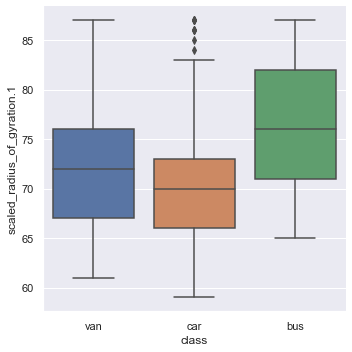

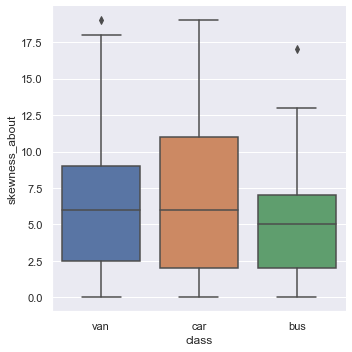

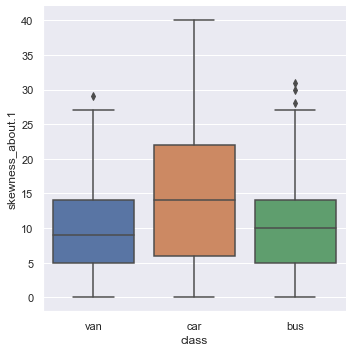

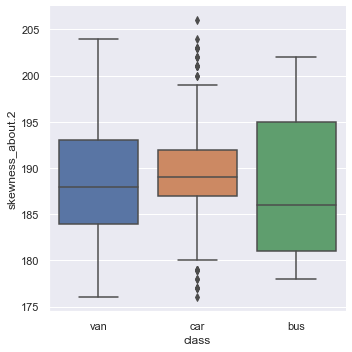

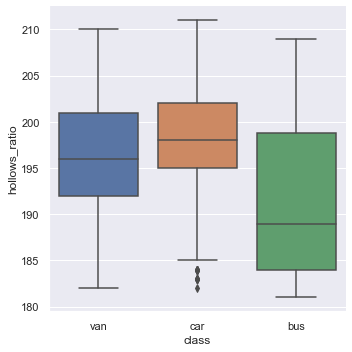

In [38]:
for i in data:
    if i != 'class' and i != 'name':
        sns.catplot(x='class',y=i,kind='box',data=data)

#### Encoding the Target attribute

In [39]:
#Encoding of categorical variable
labelencoder_X=LabelEncoder()
data['class']=labelencoder_X.fit_transform(data['class'])

#### Pairplot

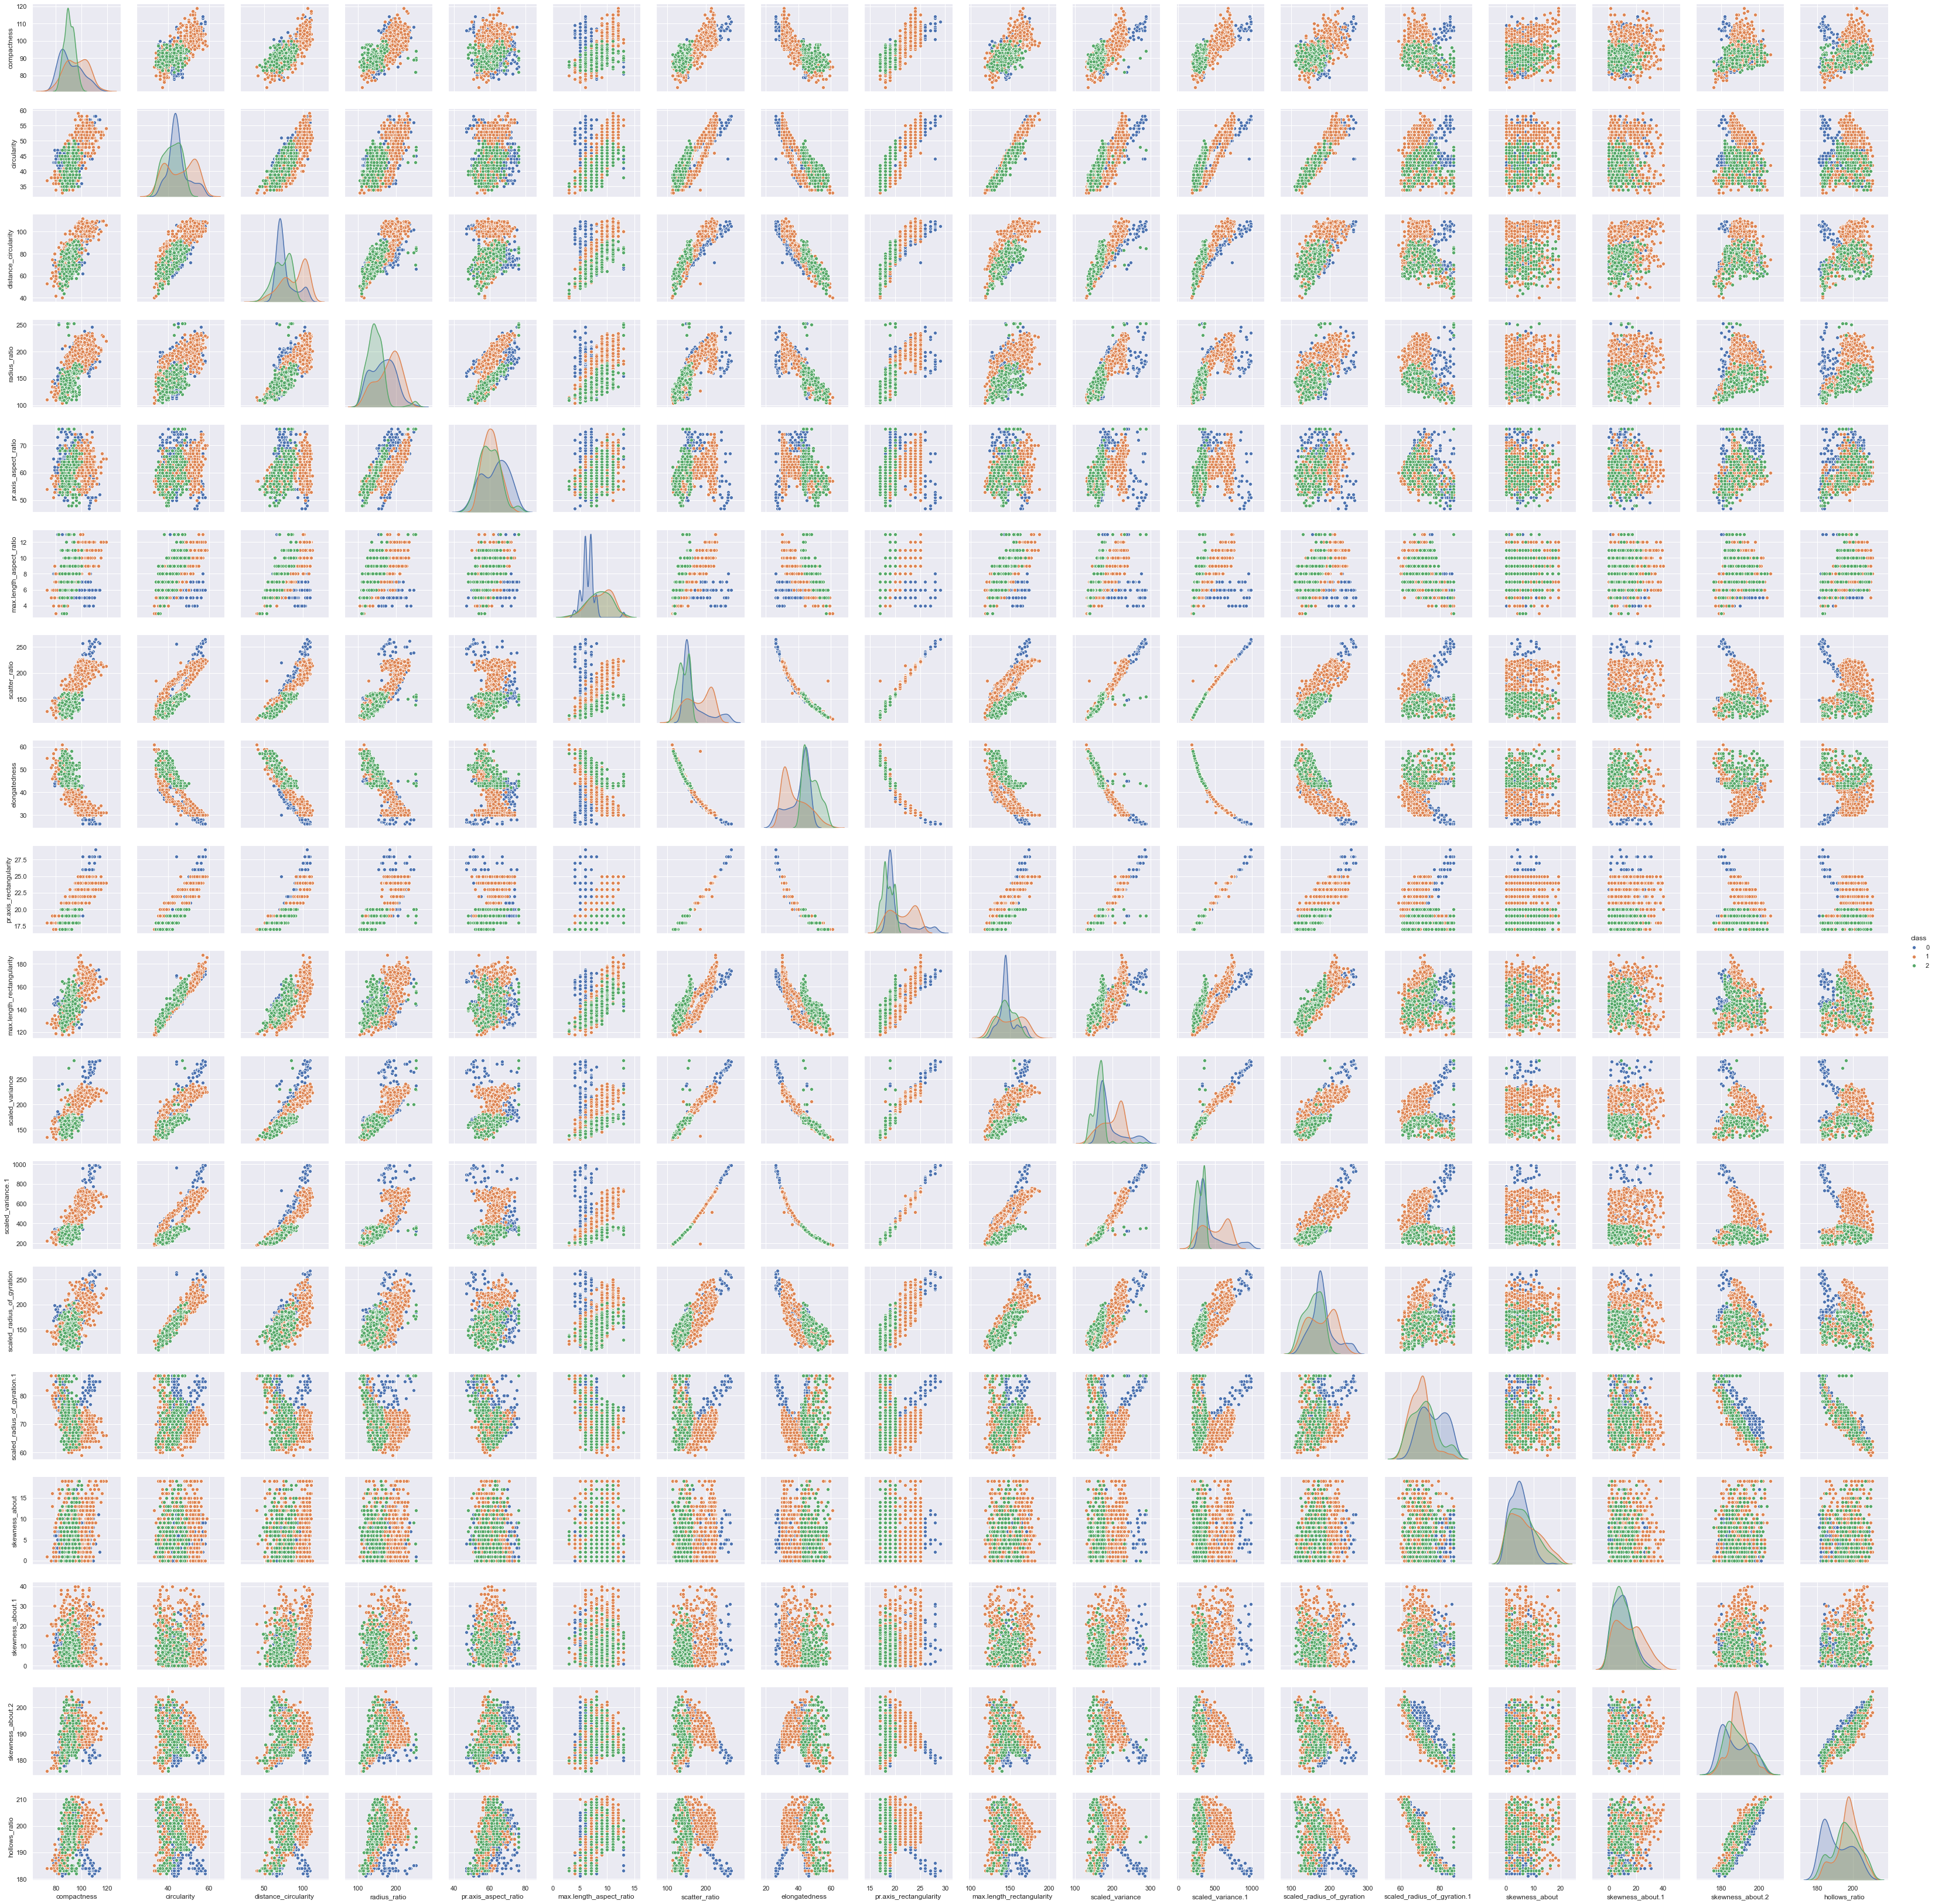

In [40]:
sns.pairplot(data,diag_kind='kde',hue='class');

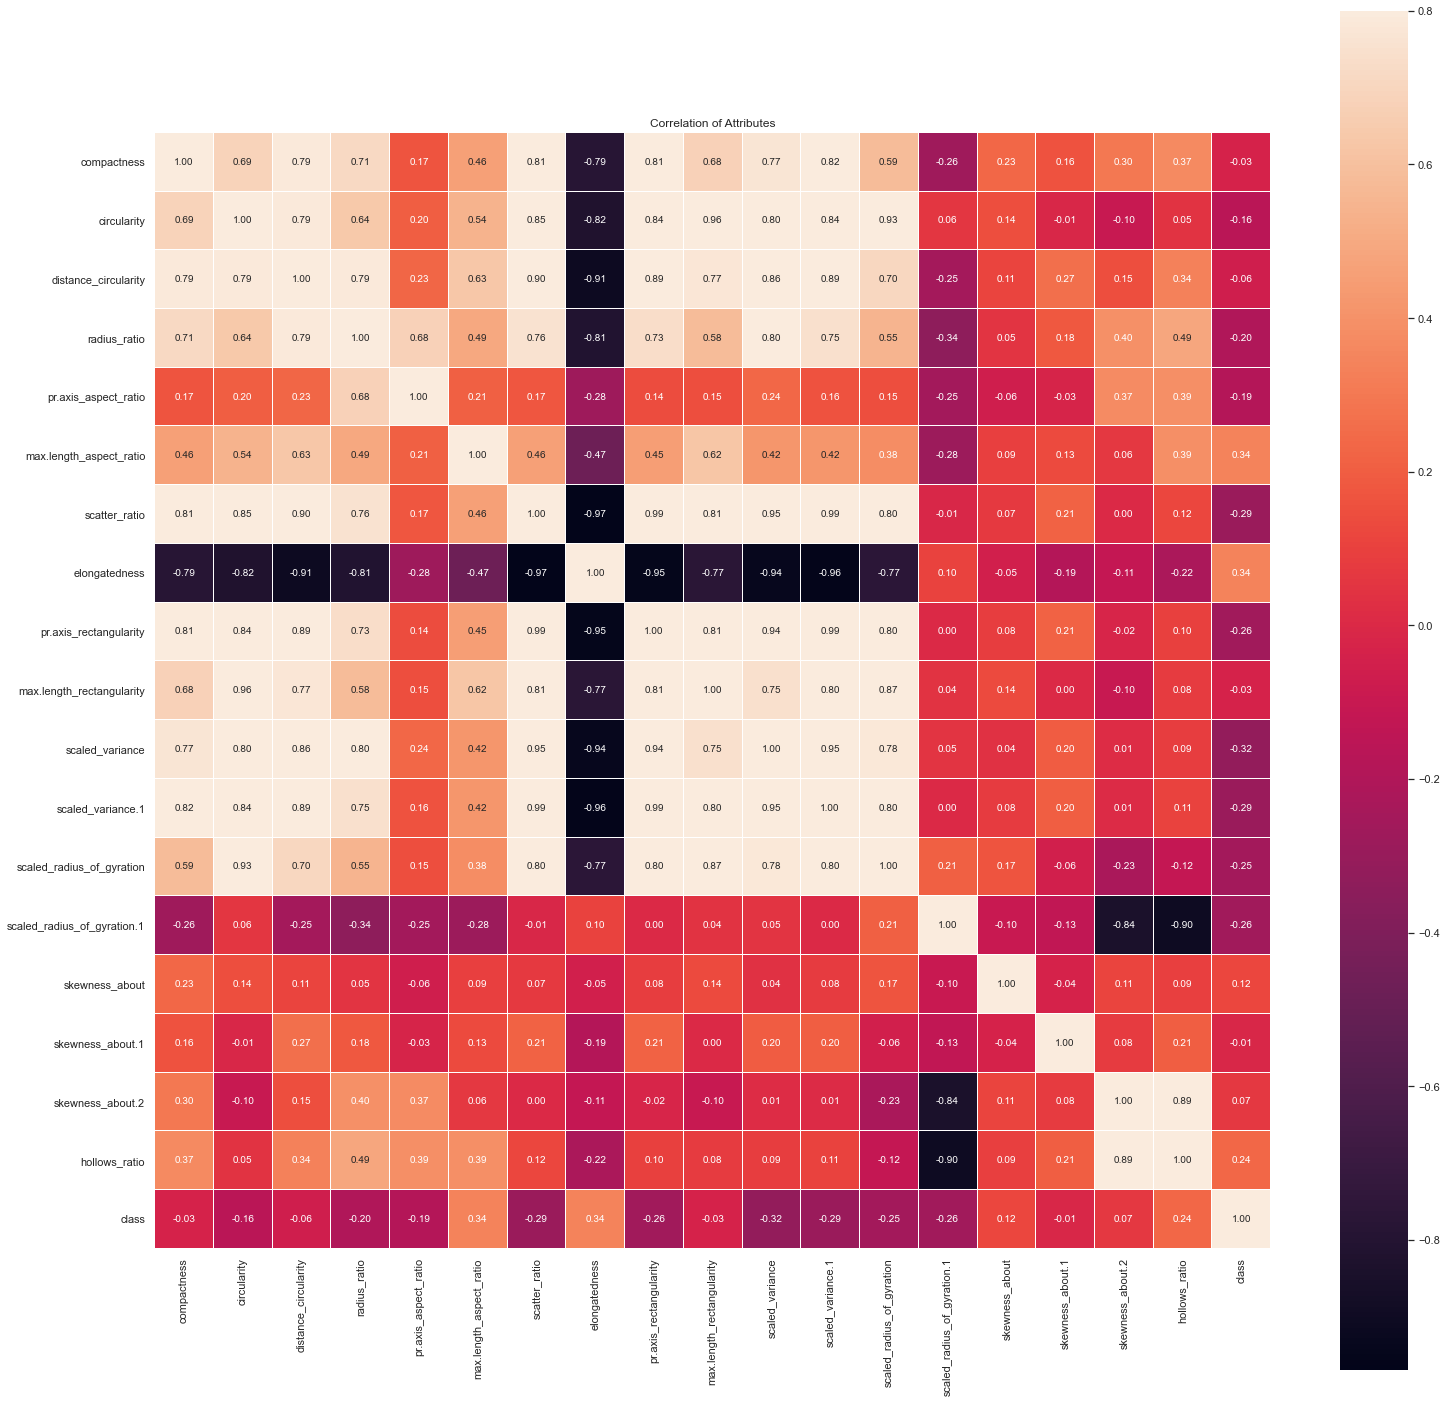

In [41]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation of Attributes')
plt.show()

### Based on Pair Plot and Correlation Matrix we Understand that

- compactness is positively associated with circularity,distance_circularity,radius_ratio,scatter_ratio,pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance.1 and is negatively associated with elonfatedness

- circularity has positive association with  distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration and  has negative assiciation with elongatedness.

- distance_circularity is positively associated  with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration and  is negatively associated  with elongatedness.

- radius_ratio is positively associated  with  pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration  is negatively associated  with elongatedness.

- pr.axis_aspect_ratio is positively associated with radius_ratio

- skewness_about and skewness_about1 doesnot have much better correlation apart from themselves

- scaled_radius_of_gyration.1 is negatively correlated with hollows_ratio and skewness_about.2.

- elongatedness is negatively associated with almost all columns 

### Finding feature importance of data

In [42]:
#lets import extra tree classifier to find out the feature importance of data
from sklearn.ensemble import ExtraTreesClassifier

In [43]:
X=data.drop('class', axis=1)
y=data[['class']]
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  76.0                     13.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         87.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

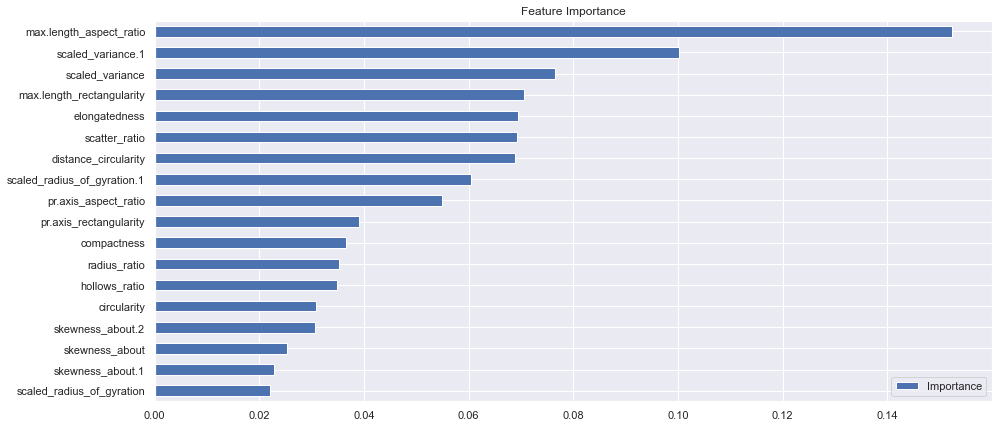

In [44]:
# Feature Importance plot using Random Forest Classifier
rf = RandomForestClassifier().fit(X, y)
pd.DataFrame(rf.feature_importances_, index = data.columns[:-1], 
             columns=['Importance']).sort_values('Importance').plot(kind='barh', figsize=(15,7), title='Feature Importance')

#### Dropping of attributes with high correlation

In [45]:
X=X.drop(['scatter_ratio','pr.axis_rectangularity','scaled_variance.1', 'scaled_variance'], axis=1)

- Dropped scatter_ratio, pr.axis_rectangularity, scaled_variance.1, scaled_variance as they are having high correlations with many of the attributes, hence to reduce the burden of dimesions dropped those attributes.
- skewness_about and skewness_about1 doesnot have much better correlation and less importance value but after analyzing the pairplot is was visible that these are highly indepednent which will add as an advantage.

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   elongatedness                846 non-null    float64
 7   max.length_rectangularity    846 non-null    float64
 8   scaled_radius_of_gyration    846 non-null    float64
 9   scaled_radius_of_gyration.1  846 non-null    float64
 10  skewness_about               846 non-null    float64
 11  skewness_about.1             846 non-null    float64
 12  skewness_about.2             846 non-null    float64
 13  hollows_ratio       

- We droped few attributes to reduce multicoliniarity between attributes which may lead to curse of dimentionality and will impact the performance of models.

### Split the data into train and test 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

#### Performing Feature Scaling on the Data

In [48]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train.shape)
print(y_train.shape)

(592, 14)
(592, 1)


In [49]:
print(X_test.shape)
print(y_test.shape)


(254, 14)
(254, 1)


### Support Vector Classifier

#### Hyperparameter Tuning

In [50]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.01, 0.05,0.5,1, 10, 25, 50, 100]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10]}]
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=25, gamma=0.01)


In [51]:
# With the best hyper parameters found as given above, the final model can be built as given below
clf=SVC(kernel='rbf', C=25, gamma=0.01)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [52]:
# check the accuracy on the training data
print('Accuracy on Training data: ',clf.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', clf.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))


Accuracy on Training data:  0.9847972972972973
Accuracy on Testing data:  0.968503937007874
Recall value:  0.9684494090982678
Precision value:  0.9624956366659686
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.97      0.98      0.98       123
           2       0.97      0.92      0.94        61

    accuracy                           0.97       254
   macro avg       0.97      0.96      0.97       254
weighted avg       0.97      0.97      0.97       254



#### Confusion matrix

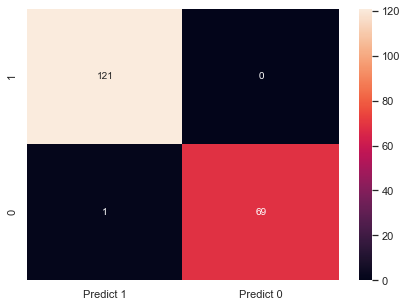

In [53]:
cm=metrics.confusion_matrix(y_test, prediction, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [54]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsDf = pd.DataFrame({'Model':['SVM - Hyper Parameter tuned(without PCA)'], 'Accuracy':clf.score(X_test , y_test) },index={'2'})

resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
2  SVM - Hyper Parameter tuned(without PCA)  0.968504

### K-fold cross validation

In [55]:
#Scaling of independent attributes
from scipy.stats import zscore
XScaled = X.apply(zscore)

In [56]:
kfold = KFold(n_splits=50, random_state=7)
model = SVC()
results = cross_val_score(model, XScaled, y, cv=kfold)

In [57]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.684% (4.461%)


In [58]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM - KFold(without PCA)'], 'Accuracy': results.mean()},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
2  SVM - Hyper Parameter tuned(without PCA)  0.968504
3                  SVM - KFold(without PCA)  0.966838

### Principal Component Analysis (PCA)

#### Standardize the data

In [59]:

XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517682              0.059308      0.286621   
1    -0.325470    -0.624110              0.122821     -0.850489   
2     1.254193     0.843908              1.520094      1.239334   
3    -0.082445    -0.624110             -0.004204     -0.297301   
4    -1.054545    -0.134771             -0.766353      1.116403   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0              1.847375                 0.845236       0.137295   
1             -0.742460                 0.379999       0.521478   
2              0.811441                 0.845236      -1.143315   
3              0.293474                 0.379999       0.649538   
4              2.537998                 2.240948       0.521478   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                   0.758332                   0.285523   
1                  -0.344578                  -0.513811   
2                   0.689401                   1.392295   
3                  -0.344578                  -1.466865   
4                  -0.275646                   0.408498   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.342926       -0.067972          0.380765   
1                    -0.033799        0.554820          0.156598   
2                     0.120764        1.592806         -0.403817   
3                    -1.424870       -0.067972         -0.291734   
4                     2.284651        0.554820         -0.179651   

   skewness_about.2  hollows_ratio  
0         -0.312208       0.183957  
1          0.013073       0.452977  
2         -0.149568       0.049447  
3          1.639478       1.529056  
4         -1.450692      -1.699181

#### Create a Covariance Matrix

In [60]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(XScaled.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[ 1.00118343  0.68636217  0.79059726  0.71118903  0.16946895  0.45679538
  -0.78905557  0.67694334  0.58575426 -0.26479572  0.23386905  0.15790522
   0.29887839  0.36598446]
 [ 0.68636217  1.00118343  0.79280285  0.63643176  0.19950774  0.53928071
  -0.8218075   0.96297741  0.92731344  0.0569312   0.14507022 -0.01138871
  -0.10494782  0.04657999]
 [ 0.79059726  0.79280285  1.00118343  0.78844215  0.23090681  0.63211576
  -0.91177521  0.77443553  0.70519293 -0.25048545  0.11319859  0.26709133
   0.14777577  0.33545957]
 [ 0.71118903  0.63643176  0.78844215  1.00118343  0.67897925  0.49187751
  -0.81439431  0.58025879  0.54887457 -0.33854872  0.05284373  0.18019787
   0.39751514  0.48570312]
 [ 0.16946895  0.19950774  0.23090681  0.67897925  1.00118343  0.21098264
  -0.27816486  0.15031509  0.14914699 -0.2517838  -0.05705867 -0.02780523
   0.37227572  0.39261778]
 [ 0.45679538  0.53928071  0.63211576  0.49187751  0.21098264  1.00118343
  -0.47295099  0.62420837  0.

#### Calculate Eigenvalues

In [61]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.33809752 -0.02222086 -0.18897516  0.00507726  0.11695689  0.31660361
   0.52387918 -0.54983901  0.34997969  0.11806769  0.01538291  0.08365008
   0.12128845  0.01997977]
 [-0.34958365  0.22559838  0.00420409  0.09717944 -0.07559829  0.04387092
  -0.34664687 -0.12982463  0.08622887 -0.1900442   0.7623589  -0.17629262
  -0.11310569  0.06451033]
 [-0.37323459  0.02976149 -0.07615247 -0.16612219 -0.01940088  0.06538772
   0.16148204  0.47312986  0.0639814  -0.16746058  0.06267627  0.64248281
  -0.29191568 -0.19434568]
 [-0.34879433 -0.1236544   0.27874849 -0.01034733  0.24815912 -0.05075695
   0.21513059  0.13865682 -0.06487812  0.13891974 -0.14527069 -0.47391903
  -0.59820127  0.16888685]
 [-0.15793551 -0.20468033  0.62432433  0.18479665  0.32277465 -0.43088044
  -0.03904359 -0.1265311   0.20724479 -0.13083826  0.02617386  0.23450913
   0.27633998 -0.09870804]
 [-0.26715573 -0.02660906 -0.10206308 -0.09610865 -0.56499105 -0.60191065
   0.28009205 -0.05150748 -0.16005594

In [62]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 44.71978521  67.24367174  75.49888176  83.44830727  89.07504072
  93.86337397  96.06532556  97.55452555  98.35447206  98.90982024
  99.28803606  99.61597315  99.85871875 100.        ]


<Figure size 720x360 with 0 Axes>

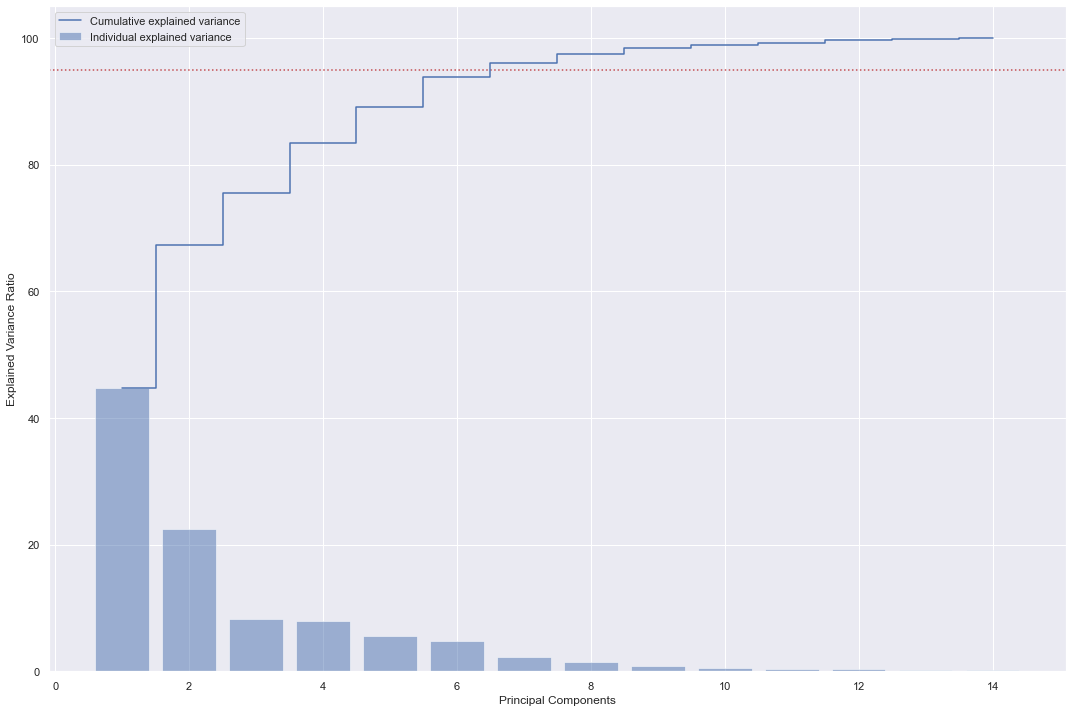

In [63]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))

plt.figure(figsize=(15,10))
plt.axhline(y=95, color='r', linestyle=':')
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


#### Observations:
- The above plot shows that, post PCA, employing 7 principal components we are able to explain more than 95% of the variance in the dataset.
- Hence we will be reducing our feature space to 7 dimensions without loosing much of information.

In [64]:
# Create a new matrix using the n components
X_projected = PCA(n_components=7).fit_transform(XScaled)
X_projected.shape

(846, 7)

In [65]:
#Converting PCA Transformed data from Array to Dataframe to visualise in the pairplot
pca_df=pd.DataFrame(X_projected)

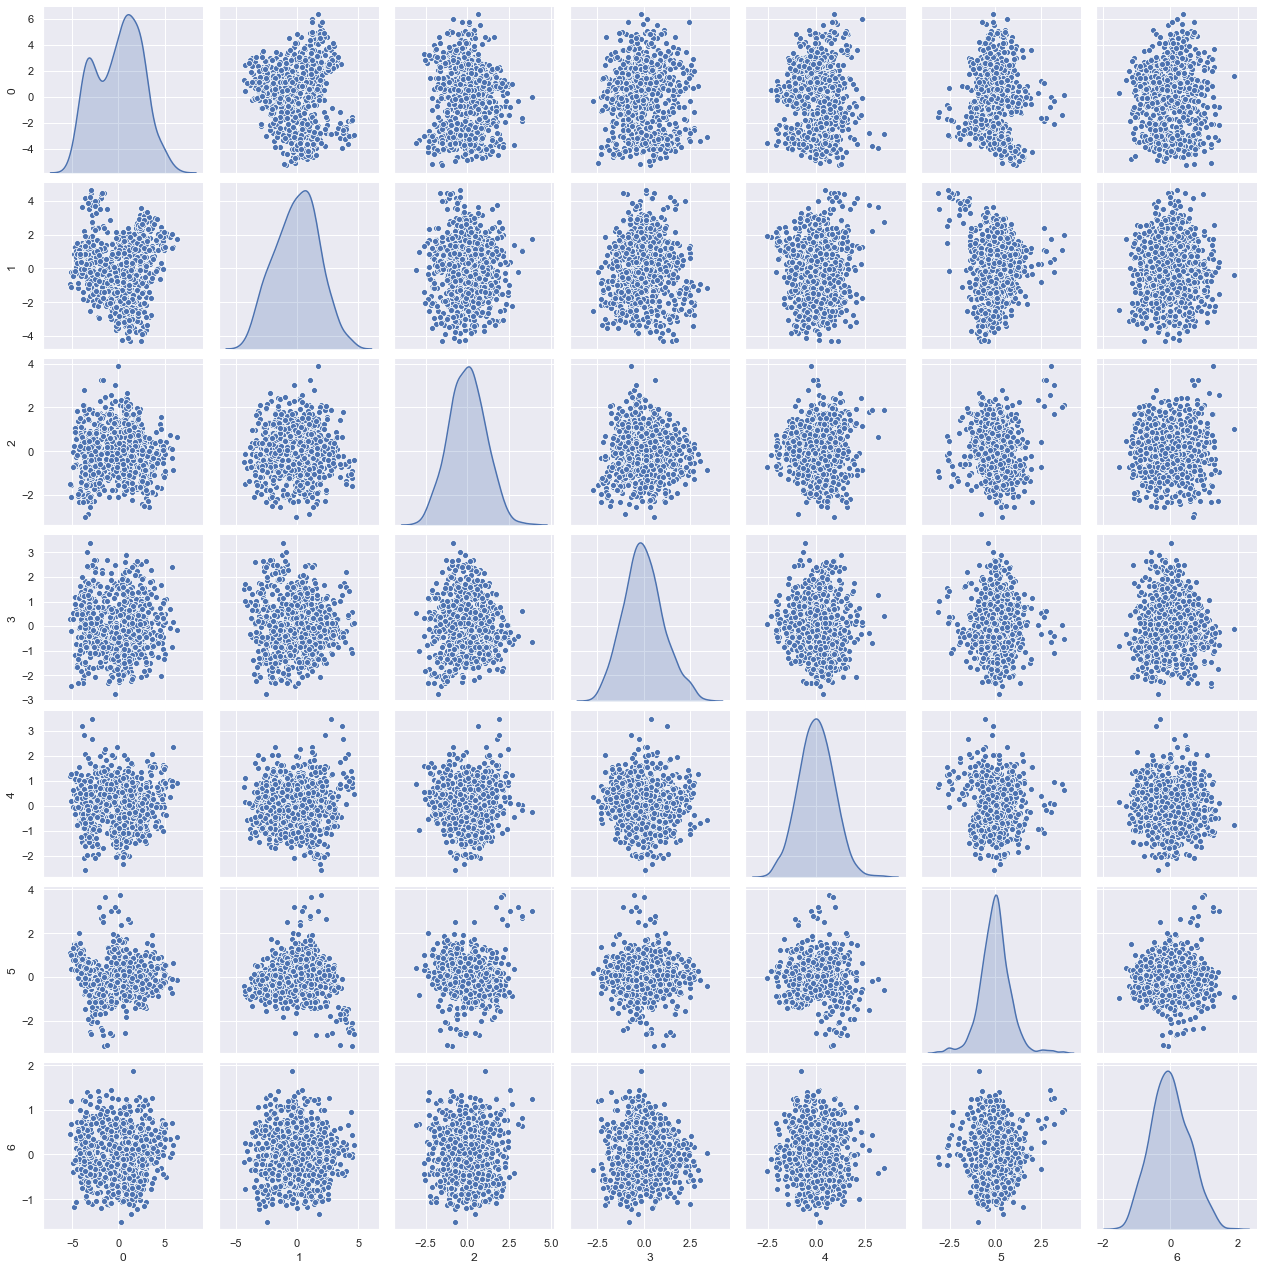

In [66]:
sns.pairplot(pca_df, diag_kind = 'kde')

#### Observation

- From above graphs we found that all the data points are in a cloud distribution
- There is no Relation between any components


In [67]:

# Divide the projected dataset into train and test split
X_projected_train, X_projected_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.3, random_state=100)
X_projected_train.shape, X_projected_test.shape, y_train.shape, y_test.shape

((592, 7), (254, 7), (592, 1), (254, 1))

### Support Vector Classifier After PCA

#### Hyperparameter tuning

In [68]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.01, 0.05,0.5,1, 10, 25, 50, 100]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10]}]

In [69]:
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for gridpca_y_trainsearch 
grid.fit(X_projected_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 0.05, 0.5, 1, 10, 25, 50, 100],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.1, 0.1, 10], 'kernel': ['linear']}])

In [70]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [71]:
clf=SVC(kernel='rbf', C=10, gamma=0.1)
clf.fit(X_projected_train, y_train)
pca_prediction = clf.predict(X_projected_test)

In [72]:
# check the accuracy on the training data
print('Accuracy on Training data: ',clf.score(X_projected_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', clf.score(X_projected_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, pca_prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, pca_prediction, average='macro'))
print("Classification Report:\n",metrics.classification_report(pca_prediction,y_test))

Accuracy on Training data:  0.9763513513513513
Accuracy on Testing data:  0.905511811023622
Recall value:  0.8998988484282601
Precision value:  0.9017921146953406
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.92      0.91      0.91       120
           2       0.83      0.84      0.83        62

    accuracy                           0.91       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254



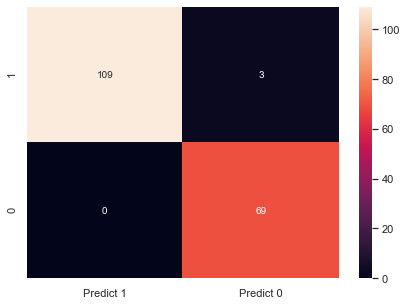

In [73]:
cm=metrics.confusion_matrix(y_test, pca_prediction, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="d")

In [74]:
tempResultsDf = pd.DataFrame({'Model':['SVM(PCA) - Hyper parameter tuned'], 'Accuracy': clf.score(X_projected_test, y_test)},index={'5'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
2  SVM - Hyper Parameter tuned(without PCA)  0.968504
3                  SVM - KFold(without PCA)  0.966838
5          SVM(PCA) - Hyper parameter tuned  0.905512

### K-fold cross validation

In [75]:
kfold = KFold(n_splits=50, random_state=7)
model = SVC()
results1 = cross_val_score(model, X_projected, y, cv=kfold)

In [76]:
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

Accuracy: 90.522% (6.051%)


In [77]:
tempResultsDf = pd.DataFrame({'Model':['SVM - KFold(PCA)'], 'Accuracy': results1.mean()},index={'6'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
2  SVM - Hyper Parameter tuned(without PCA)  0.968504
3                  SVM - KFold(without PCA)  0.966838
5          SVM(PCA) - Hyper parameter tuned  0.905512
6                          SVM - KFold(PCA)  0.905221

### Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components,

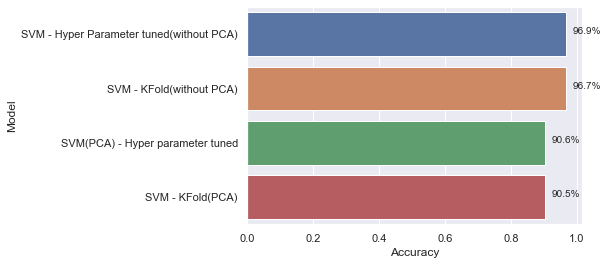

In [78]:
ax=sns.barplot(y="Model", x=("Accuracy"),data=resultsDf)

total = len(resultsDf["Accuracy"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

## Conclusions

- From the plot between Explained variance ratio and Pricipal components we came know that taking 7 components can preserve more than 95% of variance of whole data.
- Using PCA we reduced the dimension from 18 to 7 
- When we applied Support vector classifier on the reduced Dimensions we got an accuracy of about 90.5%  but the orginal dimensions scored better with 97%
### Effect of Principal Components Analysis can be more usefull in large datasets with more Dimensions

 Multicolinearity and Curse of Dimensionality are the 2 major phenomenon which adversly impact any machine learning model. With higher degree of multicolinearity, model tend to leave behind the major information that is contained in the mathematical space of the input features. And with Curse of Dimensionality because of the feature space becoming increasingly sparse for an increasing number of dimensions of a fixed-size training dataset, model tend to overfit. 
 
 Principal Component Analyis helps adressing these problem and improves the model performance to a great extent.

    


